In [31]:
# Import Libraries
import os
import pickle
import json
import warnings
import tweepy
import pandas as pd
import numpy as np
import sqlite3
import ast
import re
import string
import preprocessor as p
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix

from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
factory = StemmerFactory()
stemmer = factory.create_stemmer()
listStopword =  set(stopwords.words('indonesian'))  
engine = sqlite3.connect(os.path.join('..','db','data.db'), check_same_thread=False)
update = True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
"""
def crawling(keyword, noOfTweet):
    tweets = tweepy.Cursor(api.search_tweets, q=keyword, lang='id', tweet_mode='extended').items(noOfTweet)
    tweet_list = []

    for tweet in tweets:
        if 'retweeted_status' in tweet._json:
            tweet_text = [keyword,tweet._json['retweeted_status']['created_at'],tweet._json['retweeted_status']['user']['screen_name'],tweet._json['retweeted_status']['full_text']]
        else:
            tweet_text = [keyword,tweet.created_at,tweet.user.screen_name,tweet.full_text]
        tweet_list.append(tweet_text)
    tweet_list = pd.DataFrame(tweet_list, columns=['keywords','created_at','username','full_text'])
    tweet_list['created_at'] = pd.to_datetime(tweet_list['created_at'], utc = True)
    tweet_list.drop_duplicates(inplace = True)
    return tweet_list
"""


In [7]:
pd.DataFrame({
    "keywords":["tastylemon"]
}).to_sql("ig_keywords",con=engine, index=False, if_exists="replace")

In [32]:
pd.read_sql_query("select * from ig_crawling", con=engine)

,keywords,created_at,username,full_text
0,#tastylemon,2022-01-24T01:42:43.000Z,organiku,Sobat Foodie..\n\nProduk minuman sehat dan seg...
1,#tastylemon,2020-07-01T01:25:37.000Z,kurmasukarimadinah,"Lemon Ginger / Lemon Jahe, Kesegaran Dalam Sat..."
2,#tastylemon,2021-05-03T21:26:09.000Z,madame.garage,Tasty lemon with a silk ikat shade. 🍋Vintage y...
3,#tastylemon,2022-01-03T03:53:01.000Z,charliesangelsphotography,El mejor Acai bowl en Tasty Lemon Kissimmee Fl...
4,#tastylemon,2021-08-25T17:45:29.000Z,momof3g.a.l.s,Yummy in my Tummy 🍋🥭🍍Mango Pineapple Lemonade ...
...,...,...,...,...
1699,#tastylemon,2015-05-13T07:47:39.000Z,flavking,Lust auf 🐟 Surf & 🍖 Turf? Mit dem ♻️ #Everythi...
1700,#tastylemon,2015-05-12T09:05:27.000Z,flavking,Am Donnerstag ist 👨🏻 #Vatertag • Der perfekte ...
1701,#tastylemon,2015-01-07T09:30:30.000Z,jxt_official,Summer 2014/15 - Echuca #murray #river #echuca...
1702,#tastylemon,2014-03-30T23:06:04.000Z,delusionalhabit,#YiLo #tastylemon #candy #medicated #foodporn ...


In [41]:
keys = pd.read_sql_query("select * from ig_keywords", con=engine).values.reshape(1,-1)[0].tolist()

In [14]:
"""
if update:
    df = pd.DataFrame()
    for key in keys:
        n_list = crawling(key,1000)
        df = pd.concat([df,n_list])
    df.drop_duplicates(inplace = True)
    df['created_at'] = df['created_at'].astype(str).str.split('+',expand=True).loc[:,0]
    df.reset_index(drop=True,inplace=True)
    df.to_sql("crawling",con=engine,if_exists="replace",index=False)
else:
    df = pd.read_sql_query("select * from crawling", con=engine)
df
"""


,keywords,created_at,username,full_text
0,lemon,2022-04-08 08:56:17,olshhop,"Netijen, please do your magic. Bantu jualan gu..."
1,lemon,2022-04-08 08:56:14,pemudahijrah08,@lemon_oliveoil Tertipu oleh filter
2,lemon,2022-04-08 08:54:18,lemon_appss,"@motoraespa fee start 1k, fast tf, bisa langsu..."
3,lemon,2022-04-08 08:52:29,icannn___,@lemon_oliveoil siapa tuh
4,lemon,2022-04-08 08:50:39,jarotantonfw,@lemon_oliveoil Lah terus apa fungsinya dicipt...
...,...,...,...,...
920,lemon,2022-04-07 07:45:15,warunkkomedi,Solusi buat temen ente yang pas lagi puasa nga...
921,lemon,2022-04-07 11:29:38,nindiasriani,"@ohmybeautybank Ini termasuk murah menurutku, ..."
922,lemon,2022-04-07 11:29:07,esteh_lemon,Apakah aku termasuk psikopat karena minum yaku...
923,lemon,2022-04-07 11:22:30,tripleeein,"@bubukzinu ada salmon sashimi, octopus, sea ur..."


In [19]:
contents = pd.read_csv('result.csv')
contents.head(1)

,postUrl,profileUrl,username,fullName,commentCount,likeCount,pubDate,description,location,imgUrl,postId,ownerId,type,query,timestamp,isSidecar,sidecarMedias,videoUrl,viewCount
0,https://www.instagram.com/p/CZGEOk-hXKR/,https://www.instagram.com/organiku,organiku,Organiku | Organic Shop,0,3,2022-01-24T01:42:43.000Z,Sobat Foodie..\n\nProduk minuman sehat dan seg...,Organiku,https://instagram.fhio3-1.fna.fbcdn.net/v/t51....,2757910415773364700,453178711,Photo,#tastylemon,2022-04-08T02:18:43.301Z,False,NaN,NaN,NaN


In [17]:
import csv

In [82]:
con = engine
cur = con.cursor()

with open('result.csv','r', encoding="utf8") as fin: 
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['query'], i['pubDate'], i['username'], i['description']) for i in dr]

cur.executemany("INSERT INTO ig_crawling (keywords, created_at, username,full_text ) VALUES (?, ?, ?, ?);", to_db, if_exists ='replace' )
con.commit()


TypeError: executemany() takes no keyword arguments

In [34]:
df = pd.read_sql_query("select * from ig_crawling", con=engine)

In [35]:
df

,keywords,created_at,username,full_text
0,#tastylemon,2022-01-24T01:42:43.000Z,organiku,Sobat Foodie..\n\nProduk minuman sehat dan seg...
1,#tastylemon,2020-07-01T01:25:37.000Z,kurmasukarimadinah,"Lemon Ginger / Lemon Jahe, Kesegaran Dalam Sat..."
2,#tastylemon,2021-05-03T21:26:09.000Z,madame.garage,Tasty lemon with a silk ikat shade. 🍋Vintage y...
3,#tastylemon,2022-01-03T03:53:01.000Z,charliesangelsphotography,El mejor Acai bowl en Tasty Lemon Kissimmee Fl...
4,#tastylemon,2021-08-25T17:45:29.000Z,momof3g.a.l.s,Yummy in my Tummy 🍋🥭🍍Mango Pineapple Lemonade ...
...,...,...,...,...
1699,#tastylemon,2015-05-13T07:47:39.000Z,flavking,Lust auf 🐟 Surf & 🍖 Turf? Mit dem ♻️ #Everythi...
1700,#tastylemon,2015-05-12T09:05:27.000Z,flavking,Am Donnerstag ist 👨🏻 #Vatertag • Der perfekte ...
1701,#tastylemon,2015-01-07T09:30:30.000Z,jxt_official,Summer 2014/15 - Echuca #murray #river #echuca...
1702,#tastylemon,2014-03-30T23:06:04.000Z,delusionalhabit,#YiLo #tastylemon #candy #medicated #foodporn ...


In [36]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

emoticons = emoticons_happy.union(emoticons_sad)

In [37]:
df_cleaned = df.iloc[:,:2].copy()
cleaned = []
for n in df['full_text'].values:
    n = p.clean(n)
    n = n.lower()
    n = re.sub(r':', '', n)
    n = re.sub(r'‚Ä¶', '', n)
    n = re.sub(r'[^\x00-\x7F]+',' ', n)
    n = emoji_pattern.sub(r'', n)
    n = re.sub('[^a-zA-Z]', ' ', n)
    n = re.sub("&lt;/?.*?&gt;","&lt;&gt;",n)
    n = re.sub("(\\d|\\W)+"," ",n)
    n = re.sub(r'â', '', n)
    n = re.sub(r'€', '', n)
    n = re.sub(r'¦', '', n)
    cleaned.append(n)
df['cleaned'] = cleaned

In [38]:
file_2  = open(os.path.join("..","data","cleaning_source","update_combined_slang_words.txt"), "r")
content2 = file_2.read()
slang_words = ast.literal_eval(content2)

In [39]:
tokenized = []
df_tokenized = df.iloc[:,:2].copy()
for n in cleaned:
    n = word_tokenize(n)
    for w in n:
        if w in slang_words.keys():
            n[n.index(w)] = slang_words[w]
    tokenized.append(n)
df['tokenized'] = [', '.join(n) for n in tokenized]

In [42]:
removed = []
listtoberemoved = ["#tastylemon"]
for ts in tokenized:
    n = []
    for t in ts:
        if t not in keys+listtoberemoved and t not in listStopword and t not in emoticons and t not in string.punctuation:
            n.append(t)
    removed.append(n)
df['removed'] = [', '.join(n) for n in removed]

In [43]:
stemmed = []
for n in removed:
    n = ' '.join(n)
    n = stemmer.stem(n)
    n = n.split(' ')
    stemmed.append(n)
df['stemmed'] = [' '.join(n) for n in stemmed]

In [44]:
df.to_csv(os.path.join('..','data','ig_prep.csv'),index=False)
df.to_excel(os.path.join('..','data','ig_prep.xlsx'),index=False)

In [45]:
df = pd.read_csv(os.path.join('..','data','ig_prep.csv'))

In [81]:
#stemmed = [word_tokenize(n) for n in df['stemmed'].values]

In [47]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv(os.path.join('..','data','lexicon','modified_full_lexicon.csv'))
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [48]:
sencol =[]
senrow =np.array([])
nsen = 0
lexicon_word = lexicon['word'].to_list()
sentiment_list = []
def found_word(ind,words,word,sen,sencol,sentiment,add):
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
        sencol.append(word)
        sen.append(1)
        add += 1
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
for i in range(len(stemmed)):
    nsen = senrow.shape[0]
    sentiment = 0 
    words = stemmed[i].copy()
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [49]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)
df_sen.head(10)

,sobat,produk,minum,sehat,segar,manfaat,hasil,buah,asli,pilih,...,hias,hidang,poin,sebenernya,sweet,lot,solo,esa,ab,sentiment
0,1,1,2,3,1,2,2,1,1,1,...,0,0,0,0,0,0,0,0,0,48
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [50]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['full_text'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()
cek_df.head(10)

,text,sentiment
0,Sobat Foodie..\n\nProduk minuman sehat dan seg...,48
1,"Lemon Ginger / Lemon Jahe, Kesegaran Dalam Sat...",8
2,Tasty lemon with a silk ikat shade. 🍋Vintage y...,1
3,El mejor Acai bowl en Tasty Lemon Kissimmee Fl...,-3
4,Yummy in my Tummy 🍋🥭🍍Mango Pineapple Lemonade ...,-4
5,Hoe leuk is deze kubus? \n\nJe kunt hem vinden...,0
6,November ini Sobat Tasty bisa hemat sampai 20%...,15
7,We finally made it to the #weekend Enjoy today...,3
8,"Ngga kalah dari extract, Tasty Lemon Syrup jug...",37
9,Alhamdulillah Tasty Lemon terasa manfaatnya. J...,15


Text(0.5, 0, 'sentiment')

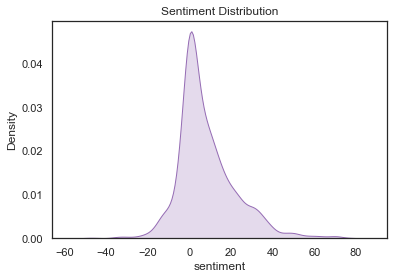

In [51]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<AxesSubplot:xlabel='sentiment'>

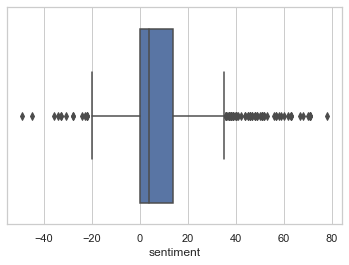

In [52]:
sns.set(style="whitegrid") 
sns.boxplot(x=df_sen['sentiment'])

In [53]:
df_sen.describe()

,sobat,produk,minum,sehat,segar,manfaat,hasil,buah,asli,pilih,...,hias,hidang,poin,sebenernya,sweet,lot,solo,esa,ab,sentiment
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,...,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,0.010563,0.119718,0.238850,0.360915,0.093897,0.213028,0.021127,0.063967,0.052817,0.051643,...,0.001174,0.001174,0.001174,0.001174,0.000587,0.000587,0.000587,0.000587,0.001761,8.058099
std,0.113167,0.423597,0.613887,0.706914,0.361845,0.572244,0.155614,0.342719,0.264616,0.275710,...,0.034249,0.034249,0.034249,0.034249,0.024225,0.024225,0.024225,0.024225,0.041934,14.117352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
max,2.000000,4.000000,6.000000,5.000000,3.000000,5.000000,2.000000,7.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000


In [54]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

au = get_top_abs_correlations(df_sen, 15)

In [55]:
top10 = au[au<float(1)][0:10]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)

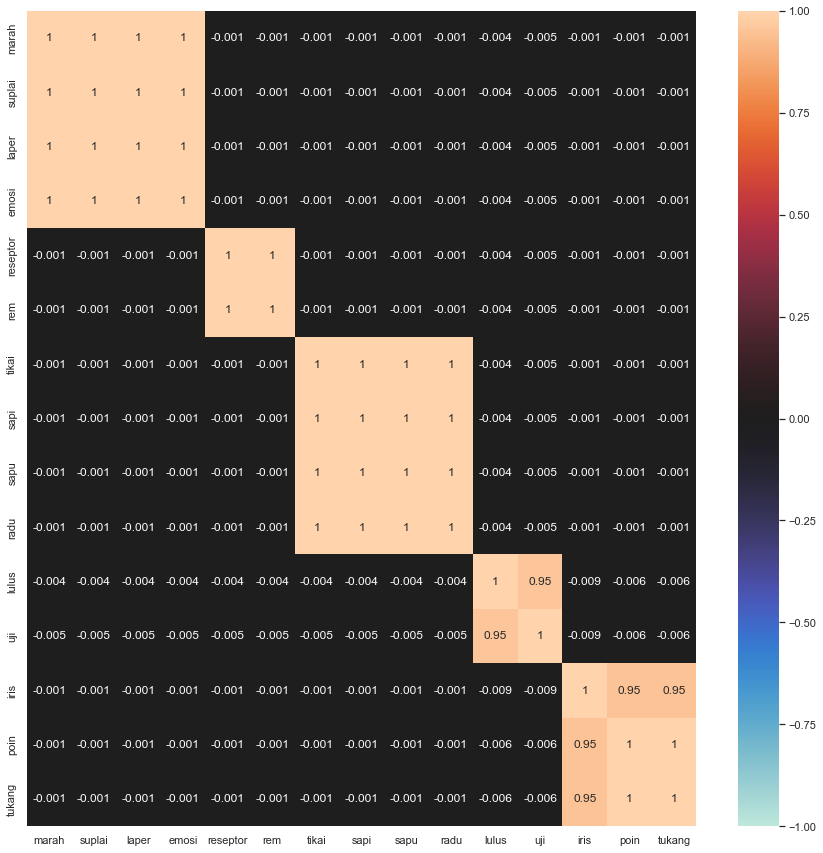

In [56]:
plt.figure(figsize=(15,15))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

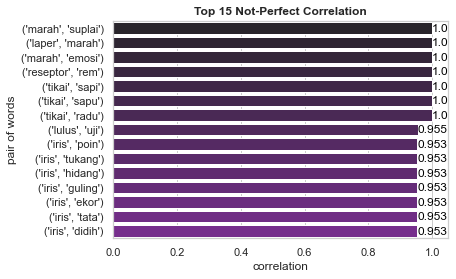

In [57]:
top15 = au[au<float(1)][0:15]
pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
g = sns.barplot(y = [str(n) for n in top15.index] , x = top15,palette=pal)
g.grid=False
plt.xlabel('correlation')
plt.ylabel('pair of words')
plt.title("Top 15 Not-Perfect Correlation",fontweight='bold') 
for i in range(15):
    g.text(top15[i],i+0.22, round(top15[i],3),color='black')
plt.show()

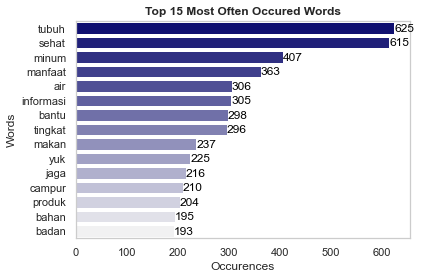

In [58]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

In [59]:
df['sentiment'] = df_sen['sentiment']

In [60]:
df.head(5)

,keywords,created_at,username,full_text,cleaned,tokenized,removed,stemmed,sentiment
0,#tastylemon,2022-01-24T01:42:43.000Z,organiku,Sobat Foodie..\n\nProduk minuman sehat dan seg...,sobat foodie produk minuman sehat dan segar sa...,"sobat, foodie, produk, minuman, sehat, dan, se...","sobat, foodie, produk, minuman, sehat, segar, ...",sobat foodie produk minum sehat segar sari lem...,48
1,#tastylemon,2020-07-01T01:25:37.000Z,kurmasukarimadinah,"Lemon Ginger / Lemon Jahe, Kesegaran Dalam Sat...",lemon ginger lemon jahe kesegaran dalam satu b...,"lemon, ginger, lemon, jahe, kesegaran, dalam, ...","lemon, ginger, lemon, jahe, kesegaran, botol, ...",lemon ginger lemon jahe segar botol tambah sta...,8
2,#tastylemon,2021-05-03T21:26:09.000Z,madame.garage,Tasty lemon with a silk ikat shade. 🍋Vintage y...,tasty lemon with a silk ikat shade vintage yel...,"tasty, lemon, with, a, silk, ikat, shade, vint...","tasty, lemon, with, a, silk, ikat, shade, vint...",tasty lemon with a silk ikat shade vintage yel...,1
3,#tastylemon,2022-01-03T03:53:01.000Z,charliesangelsphotography,El mejor Acai bowl en Tasty Lemon Kissimmee Fl...,el mejor acai bowl en tasty lemon kissimmee fl...,"el, mejor, acai, bowl, en, tasty, lemon, kissi...","el, mejor, acai, bowl, en, tasty, lemon, kissi...",el mejor acai bowl en tasty lemon kissimmee fl...,-3
4,#tastylemon,2021-08-25T17:45:29.000Z,momof3g.a.l.s,Yummy in my Tummy 🍋🥭🍍Mango Pineapple Lemonade ...,yummy in my tummy mango pineapple lemonade fro...,"yummy, in, my, tummy, mango, pineapple, lemona...","yummy, in, my, tummy, mango, pineapple, lemona...",yummy in my tummy mango pineapple lemonade fro...,-4


In [61]:
df.loc[df['sentiment'] == 0, 'label'] = 'neutral'
df.loc[df['sentiment'] > 0, 'label'] = 'positive'
df.loc[df['sentiment'] < 0, 'label'] = 'negative'
df['label'].value_counts()

positive    1084
negative     311
neutral      309
Name: label, dtype: int64

In [62]:
vectorizer = CountVectorizer(max_features=1500, min_df=2, max_df=0.8)
X = vectorizer.fit_transform([" ".join(x) for x in stemmed]).toarray()
pd.DataFrame(X,columns=vectorizer.get_feature_names()).to_csv("../data/tfidf.csv",index=None)

In [63]:
pd.DataFrame(X,columns=vectorizer.get_feature_names())

,aamiin,aan,abis,about,acai,activaty,adang,add,adik,admin,...,zitten,zo,zoals,zoek,zonder,zu,zuckerzusatz,zullen,zum,zutaten
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()
pd.DataFrame(X,columns=vectorizer.get_feature_names()).to_csv(os.path.join("..","data","tfidf_norm.csv"),index=None)

In [65]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [66]:
sm = SMOTE()
Xres,yres = sm.fit_resample(X,y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(Xres, yres, test_size = 0.2, random_state=42, shuffle=True)

In [68]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=1000)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


{'var_smoothing': 0.00013095350204826676}

In [69]:
y_pred = gs_NB.predict(X_train)
y_pred_ = gs_NB.predict(X_test)

In [70]:
print(classification_report(y_train,y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.93      0.93      0.93       871
     neutral       0.91      0.99      0.95       882
    positive       0.96      0.89      0.92       848

    accuracy                           0.93      2601
   macro avg       0.94      0.93      0.93      2601
weighted avg       0.94      0.93      0.93      2601



In [71]:
print(classification_report(y_test,y_pred_, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.85      0.92      0.88       213
     neutral       0.92      0.96      0.94       202
    positive       0.93      0.83      0.88       236

    accuracy                           0.90       651
   macro avg       0.90      0.90      0.90       651
weighted avg       0.90      0.90      0.90       651



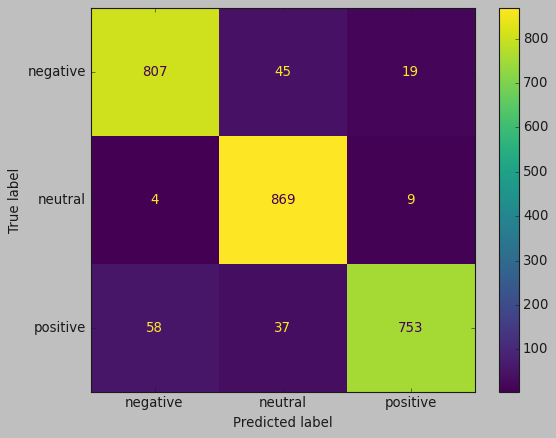

In [72]:
plt.style.use('classic')
plot_confusion_matrix(gs_NB,X_train,y_train, values_format = '.5g', display_labels=le.classes_)
plt.show()

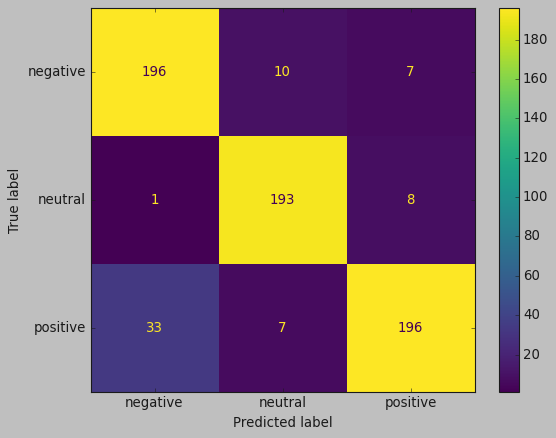

In [73]:
plt.style.use('classic')
plot_confusion_matrix(gs_NB,X_test,y_test, values_format = '.5g', display_labels=le.classes_)
plt.show()

In [80]:
pickle.dump(vectorizer,open(os.path.join('..','model','ig_vectorizer.sav'),'wb'))
pickle.dump(tfidfconverter,open(os.path.join('..','model','ig_tfidfconverter.sav'),'wb'))
pickle.dump(le,open(os.path.join('..','model','ig_le.sav'),'wb'))
pickle.dump(sm,open(os.path.join('..','model','ig_smote.sav'),'wb'))
pickle.dump(gs_NB,open(os.path.join('..','model','ig_clf.sav'),'wb'))

In [75]:
df

,keywords,created_at,username,full_text,cleaned,tokenized,removed,stemmed,sentiment,label
0,#tastylemon,2022-01-24T01:42:43.000Z,organiku,Sobat Foodie..\n\nProduk minuman sehat dan seg...,sobat foodie produk minuman sehat dan segar sa...,"sobat, foodie, produk, minuman, sehat, dan, se...","sobat, foodie, produk, minuman, sehat, segar, ...",sobat foodie produk minum sehat segar sari lem...,48,positive
1,#tastylemon,2020-07-01T01:25:37.000Z,kurmasukarimadinah,"Lemon Ginger / Lemon Jahe, Kesegaran Dalam Sat...",lemon ginger lemon jahe kesegaran dalam satu b...,"lemon, ginger, lemon, jahe, kesegaran, dalam, ...","lemon, ginger, lemon, jahe, kesegaran, botol, ...",lemon ginger lemon jahe segar botol tambah sta...,8,positive
2,#tastylemon,2021-05-03T21:26:09.000Z,madame.garage,Tasty lemon with a silk ikat shade. 🍋Vintage y...,tasty lemon with a silk ikat shade vintage yel...,"tasty, lemon, with, a, silk, ikat, shade, vint...","tasty, lemon, with, a, silk, ikat, shade, vint...",tasty lemon with a silk ikat shade vintage yel...,1,positive
3,#tastylemon,2022-01-03T03:53:01.000Z,charliesangelsphotography,El mejor Acai bowl en Tasty Lemon Kissimmee Fl...,el mejor acai bowl en tasty lemon kissimmee fl...,"el, mejor, acai, bowl, en, tasty, lemon, kissi...","el, mejor, acai, bowl, en, tasty, lemon, kissi...",el mejor acai bowl en tasty lemon kissimmee fl...,-3,negative
4,#tastylemon,2021-08-25T17:45:29.000Z,momof3g.a.l.s,Yummy in my Tummy 🍋🥭🍍Mango Pineapple Lemonade ...,yummy in my tummy mango pineapple lemonade fro...,"yummy, in, my, tummy, mango, pineapple, lemona...","yummy, in, my, tummy, mango, pineapple, lemona...",yummy in my tummy mango pineapple lemonade fro...,-4,negative
...,...,...,...,...,...,...,...,...,...,...
1699,#tastylemon,2015-05-13T07:47:39.000Z,flavking,Lust auf 🐟 Surf & 🍖 Turf? Mit dem ♻️ #Everythi...,lust auf surf turf mit dem welches perfekt zu ...,"lust, auf, surf, turf, mit, dem, welches, perf...","lust, auf, surf, turf, mit, dem, welches, perf...",lust auf surf turf mit dem welches perfekt zu ...,3,positive
1700,#tastylemon,2015-05-12T09:05:27.000Z,flavking,Am Donnerstag ist 👨🏻 #Vatertag • Der perfekte ...,am donnerstag ist der perfekte anlass fr eine ...,"am, donnerstag, ist, der, perfekte, anlass, fr...","am, donnerstag, ist, der, perfekte, anlass, fr...",am donnerstag ist der perfekte anlass fr eine ...,0,neutral
1701,#tastylemon,2015-01-07T09:30:30.000Z,jxt_official,Summer 2014/15 - Echuca #murray #river #echuca...,summer echuca,"summer, echuca","summer, echuca",summer echuca,0,neutral
1702,#tastylemon,2014-03-30T23:06:04.000Z,delusionalhabit,#YiLo #tastylemon #candy #medicated #foodporn ...,NaN,NaN,NaN,NaN,0,neutral


In [76]:
df.to_excel(os.path.join("..","data","ig_data_sentiment.xlsx"),index=False)
df.to_sql("data",con=engine,if_exists="replace",index=False)

In [77]:
df_sen.to_excel(os.path.join("..","data","ig_scoring_sentiment.xlsx"),index=False)
df_sen.to_sql("sentiment",con=engine,if_exists="replace",index=False)

In [79]:
json.dump(gs_NB.best_params_,open(os.path.join('..','data','ig_best_params.json'),'w'))